In [1]:
import numpy as np
import pandas as pd

In [2]:
df_london = pd.read_csv("london_crime_by_lsoa.csv")

In [3]:
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df_london.major_category

0                              Burglary
1           Violence Against the Person
2           Violence Against the Person
3                              Burglary
4                               Robbery
                       ...             
13490599                Criminal Damage
13490600                        Robbery
13490601                       Burglary
13490602                        Robbery
13490603    Violence Against the Person
Name: major_category, Length: 13490604, dtype: object

In [7]:
df_london["major_category"].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [8]:
df_london["minor_category"].value_counts()

Other Theft                               522180
Common Assault                            522180
Theft From Motor Vehicle                  522180
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Burglary in Other Buildings               522072
Criminal Damage To Motor Vehicle          521964
Other Criminal Damage                     521856
Assault with Injury                       521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [9]:
df_london.index = list(map(str, df_london.index))

In [10]:
df_london.drop(
    columns=["lsoa_code"], inplace=True
)
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
mpl.style.use(['ggplot'])

## Area Plot

Question : What are the most frequent major crimes from 2008 - 2016?

In [13]:
df_london[['major_category', 'year']]

,major_category,year
0,Burglary,2016
1,Violence Against the Person,2016
2,Violence Against the Person,2015
3,Burglary,2016
4,Robbery,2008
...,...,...
13490599,Criminal Damage,2015
13490600,Robbery,2015
13490601,Burglary,2011
13490602,Robbery,2011


In [14]:
top_crime = df_london.groupby(['major_category']).sum()
top_crime.drop(columns=["month", "year"], inplace=True)
top_crime

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


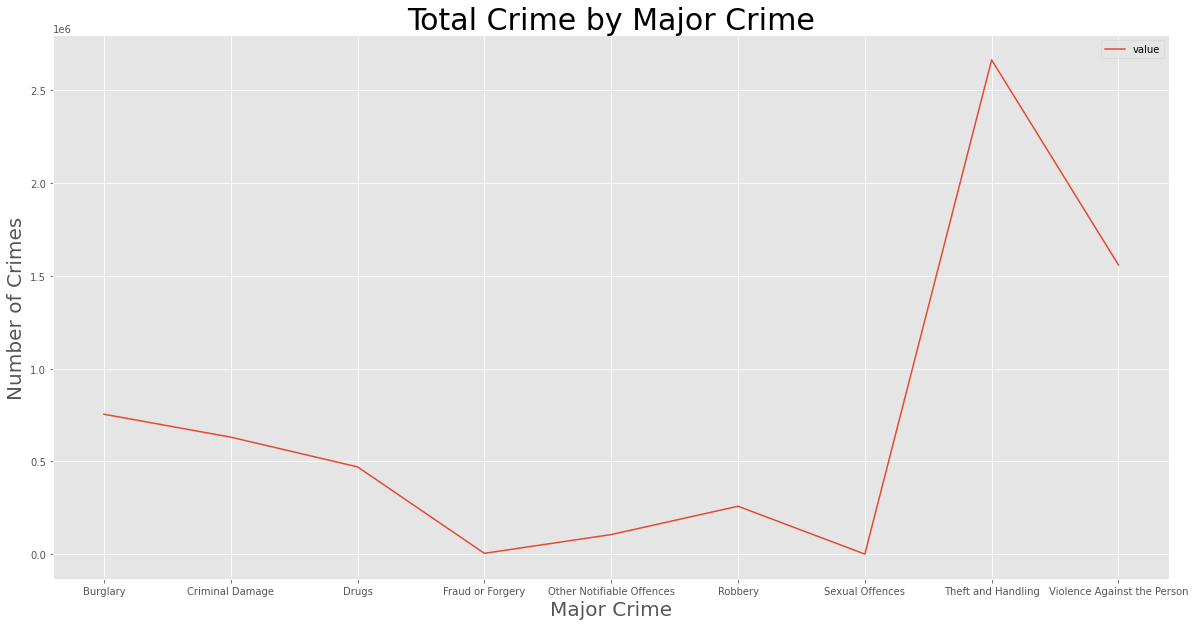

In [15]:
top_crime.plot(figsize=(20, 10))
plt.title("Total Crime by Major Crime", size = 30)
plt.ylabel("Number of Crimes", size = 20)
plt.xlabel("Major Crime", size = 20)

plt.show()

Answer : The most frequent major crime from 2008 - 2016 is Theft & Handling

## Histogram

Question : What was the frequency of contributions in London from the major category in 2016 ?

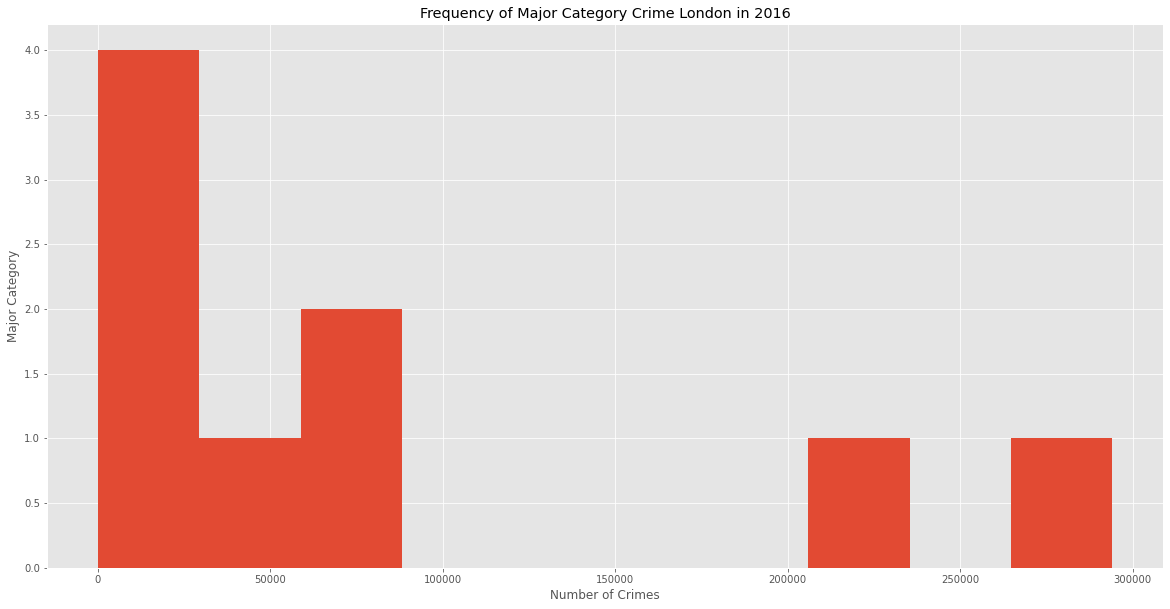

In [16]:
df_hist = df_london[
    (df_london['year'] == 2016)
].groupby(["major_category"])['value'].sum()

df_hist.plot(
    kind="hist",
    figsize=(20, 10)
)
plt.title("Frequency of Major Category Crime London in 2016")
plt.ylabel("Major Category")
plt.xlabel("Number of Crimes")

plt.show()

Answer : There are 4 major category contributed between 0 to 25000 crime

## Bar Chart

Quastion : Where was the crime most often in 2016 in London?

In [17]:
df_london

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


In [18]:
top_borough = df_london[df_london['year'] == 2016]
top_borough

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
14,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
...,...,...,...,...,...,...
13490538,Southwark,Violence Against the Person,Harassment,5,2016,6
13490565,Westminster,Theft and Handling,Theft/Taking of Pedal Cycle,0,2016,9
13490574,Kensington and Chelsea,Theft and Handling,Motor Vehicle Interference & Tampering,0,2016,2
13490579,Sutton,Drugs,Drug Trafficking,0,2016,12


In [19]:
top_borough_2016 = top_borough.groupby(['borough']).sum()
top_borough_2016.drop(columns=["month", "year"], inplace=True)
top_borough_2016

,value
borough,
Barking and Dagenham,16741
Barnet,24684
Bexley,12840
Brent,26693
Bromley,20164
Camden,29183
City of London,178
Croydon,28712
Ealing,27127


Text(0, 0.5, 'Location / Borough')

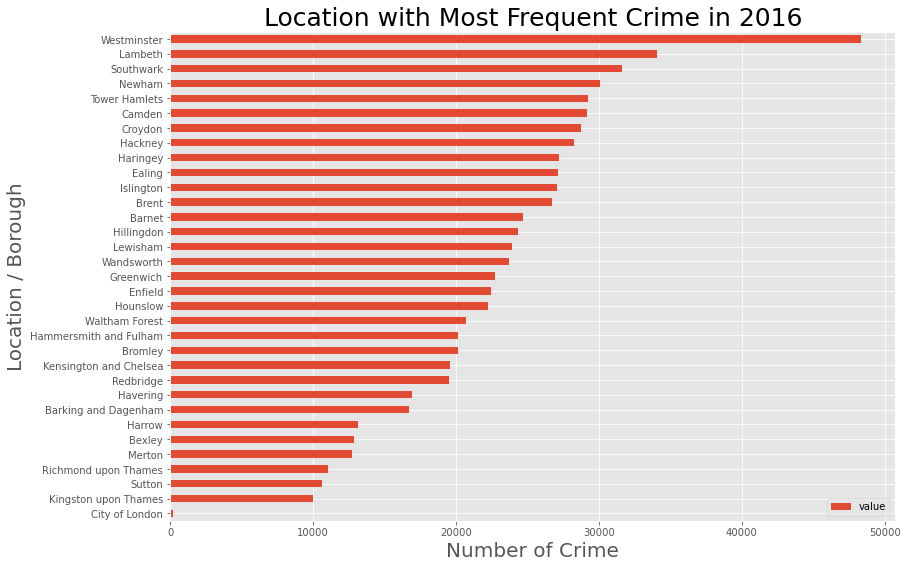

In [20]:
top_borough_2016.sort_values(['value']).plot(
    kind="barh",
    figsize=(13, 9)
)

plt.title("Location with Most Frequent Crime in 2016", size=25)
plt.xlabel("Number of Crime", size=20)
plt.ylabel("Location / Borough", size=20)

Answer : Westminster is the most often crime in London for 2016

## Pie Chart

Question : In what year is the most frequent crime in London?

In [21]:
df_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [22]:
pie_chart = df_london.groupby(["year"]).sum()
pie_chart.drop(columns=["month"],inplace=True)
pie_chart

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


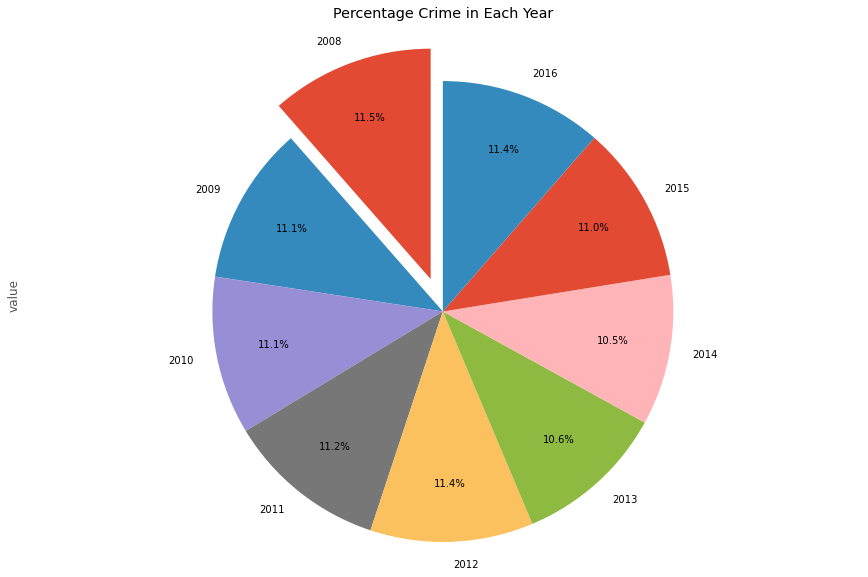

In [23]:
pie_chart.groupby("year")['value'].sum().plot(
    kind="pie",
    figsize=(15, 10),
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=.75,
    fontsize= 10,
    explode=[0.15, 0, 0, 0, 0, 0 , 0, 0, 0]
)
plt.axis("equal")
plt.title("Percentage Crime in Each Year")
plt.show()

Answer : the most frequent crimes occurred in 2008

## Word Clouds borough

Most frequents borough

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
df_wc = pd.DataFrame(df_london.groupby(['borough'])['value'].sum())
df_wc

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [26]:
london_crime = df_wc['value'].sum()
london_crime

6447758

In [27]:
max_words = 100
text = ''
for crime in df_wc.index.values:
    if len(crime.split(' ')) ==1:
        repeat_num_times = int(df_wc.loc[crime, 'value'] / float(london_crime) * max_words)
        text = text + ((crime + ' ') * repeat_num_times)

In [28]:
text

'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

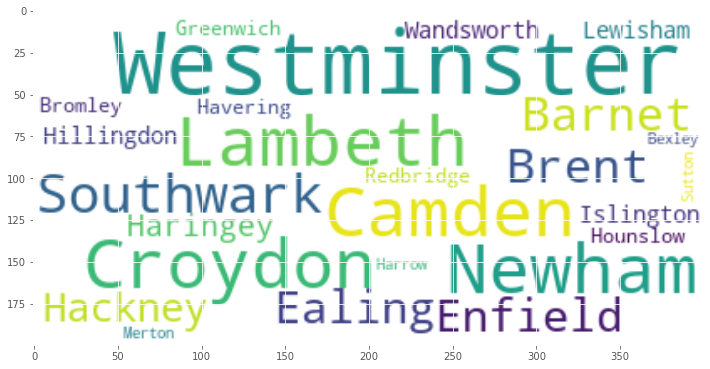

In [29]:
wc_london_crime = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(12,9))
plt.imshow(wc_london_crime, interpolation="bilinear")
plt.axis=("off")
plt.show()

## Folium

In [30]:
!pip install folium

In [31]:
import folium
from folium import plugins

In [32]:
folium.__version__

'0.11.0'

In [33]:
maps = folium.Map()
maps

In [34]:
London = folium.Map(location=(51.5073509, -0.1277583), zoom_start=8)
London